# Lab 5 - Nouh's demo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from statsmodels.graphics.mosaicplot import mosaic
import missingno as msno
from scipy.stats import skewnorm

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

**This heart disease dataframe cannot be used for your coursework.**

In [23]:
df = pd.read_csv("../labData/Heart.csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [5]:
col1 = [1.0, 2.0, np.nan, 3.0, 5.0]
col2 = [1.0, 4.0, np.nan, 3.0, np.nan]

In [7]:
testDf = pd.DataFrame(
    {
        "A" : col1,
        "B" : col2
    }
)
testDf

,A,B
0,1.0,1.0
1,2.0,4.0
2,NaN,NaN
3,3.0,3.0
4,5.0,NaN


In [9]:
testDf.isna().sum()

A    1
B    2
dtype: int64

In [10]:
impute = SimpleImputer(strategy = "mean")
# Fills in N/As with the mean of the column.

In [11]:
impute.fit_transform(testDf)

array([[1.        , 1.        ],
       [2.        , 4.        ],
       [2.75      , 2.66666667],
       [3.        , 3.        ],
       [5.        , 2.66666667]])

In [12]:
impute = SimpleImputer(strategy = "constant", fill_value = 10)
# Always fills with the defined constant value, in this case 10.

In [13]:
impute.fit_transform(testDf)

array([[ 1.,  1.],
       [ 2.,  4.],
       [10., 10.],
       [ 3.,  3.],
       [ 5., 10.]])

In [18]:
impute = KNNImputer(n_neighbors = 2)
# n_neighbors is the number of neighbours to source info from

In [19]:
impute.fit_transform(testDf)

array([[1.        , 1.        ],
       [2.        , 4.        ],
       [2.75      , 2.66666667],
       [3.        , 3.        ],
       [5.        , 3.5       ]])

**In your assignment, you need to substantiate which one you use and why.**

In [20]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


ML can't use strings and wants standardised data.

In [25]:
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [26]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [28]:
df.drop(columns = "Unnamed: 0", axis = 1, inplace = True)
df.head(1)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No


In [30]:
numCols = df.select_dtypes(include = ["float64", "int64"]).columns
# Select only the columns where the datatypes are numerical.

In [34]:
dfNum = df[numCols].head()
dfCorr = dfNum.corr()

<Axes: >

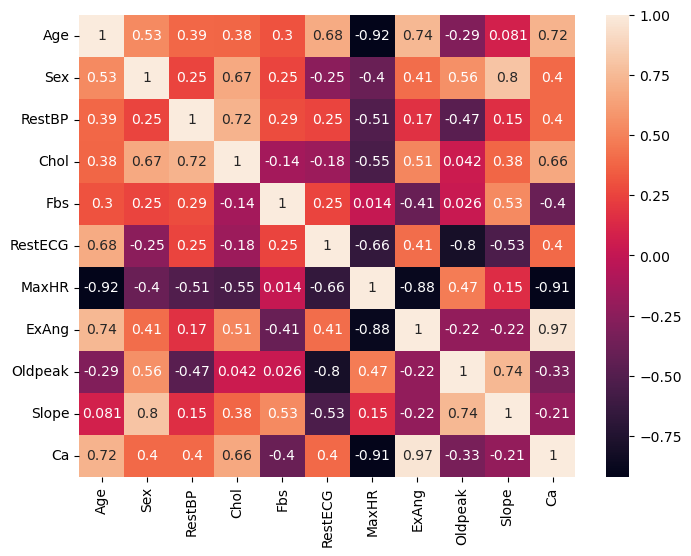

In [35]:
plt.figure(figsize = (8,6))
sns.heatmap(dfCorr, annot = True)

*"80% of your work is preprocessing"*

In [36]:
df.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [38]:
df.shape
# 303 records, 6 isn't a massive loss.

(303, 14)

**__Your coursework dataset should be around 3000 - 5000 entries in length!__**

In [39]:
df = df.dropna()
df.shape

(297, 14)

In [40]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


Machine learning can't process strings, so we should *encode* the chestPain column to numerical equivalents.

In [41]:
df["ChestPain"].value_counts()
# Only four uniques.

ChestPain
asymptomatic    142
nonanginal       83
nontypical       49
typical          23
Name: count, dtype: int64

In [42]:
df["AHD"].value_counts()
# Two uniques.

AHD
No     160
Yes    137
Name: count, dtype: int64

Nouh doesn't like hot encoding "because of the dimensionality"

In [44]:
le = LabelEncoder()
le

LabelEncoder()

In [45]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

In [47]:
df.select_dtypes(include = "object").columns

Index(['ChestPain', 'Thal', 'AHD'], dtype='object')

In [48]:
df["ChestPain"] = le.fit_transform(df["ChestPain"])

C:\Users\Lewis\AppData\Local\Temp\ipykernel_18416\518582296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ChestPain"] = le.fit_transform(df["ChestPain"])


^ Not too sure what that means, look into it at some point. ^

In [49]:
df["ChestPain"].value_counts()

ChestPain
0    142
1     83
2     49
3     23
Name: count, dtype: int64

In [ ]:
df["Thal"] = le.fit_transform(df["Thal"])
df["AHD"] = le.fit_transform(df["AHD"])

In [51]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [52]:
x = df.drop(columns = "AHD", axis = 1)
y = df['AHD']

In [54]:
x.head(1)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0


x_train and y_train as well as x_test and y_test are made by splitting the dataframe in half (???)
In doing so, the machine itself doesn't know the test data and must predict it based on what it learns from the training data.
The predictions it makes are written to x_pred and y_pred. The more data there is, the better predictions it can make.

# Using KNN to predict

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
# Test size is a percentage of the DF. Random state is the RNG seed for the chosen rows (I think)
# Because test size is 20, train size is inherently 80. 80% is training it to predict the 20%.

In [58]:
x_train.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
277,39,0,1,138,220,0,0,152,0,0.0,2,0.0,1
262,60,0,3,150,240,0,0,171,0,0.9,1,0.0,1
30,69,0,3,140,239,0,0,151,0,1.8,1,2.0,1
22,58,1,2,120,284,0,2,160,0,1.8,2,0.0,1
281,47,1,1,130,253,0,0,179,0,0.0,1,0.0,1


Notice how the row indexes are random

In [59]:
scaler = MinMaxScaler()

In [60]:
x_train = scaler.fit_transform(x_train)

In [62]:
x_train

array([[0.20833333, 0.        , 0.33333333, ..., 0.5       , 0.        ,
        0.5       ],
       [0.64583333, 0.        , 1.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.83333333, 0.        , 1.        , ..., 0.        , 0.66666667,
        0.5       ],
       ...,
       [0.58333333, 1.        , 0.33333333, ..., 0.5       , 0.33333333,
        1.        ],
       [0.625     , 1.        , 1.        , ..., 0.        , 0.66666667,
        0.5       ],
       [0.875     , 0.        , 0.33333333, ..., 0.        , 0.33333333,
        0.5       ]])

In [65]:
# Max should always be 1, min always 0.
print(x_train.max())
print(x_train.min())

1.0
0.0


In [66]:
x_test = scaler.transform(x_test)

**Research how to know how many neighbours to use.**

In [87]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [88]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
y_pred = knn.predict(x_test)

In [90]:
accuracy_score(y_test, y_pred)
# 86.6% accurate. 4 neighbours is 80%, so it seems that 3 was the sweet-spot.

0.8666666666666667

**If you do a classification problem, a confusion matrix MUST be included.**

<Axes: >

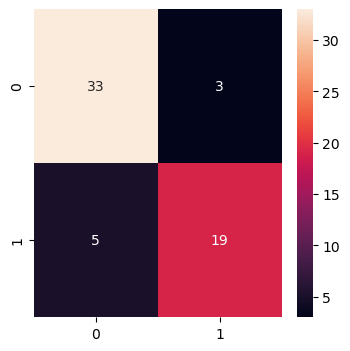

In [91]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot = True)

This shows the model's correct and incorrect predictions. It thought five 1s were 0s, and three 0s were 1s.

**Top row is "true-false", showing the correct predictions first.**

**Bottom row is "false-true", showing the wrong predictions first.**

In [92]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.79      0.86      0.83        22

    accuracy                           0.87        60
   macro avg       0.85      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60



This shows that it predicted 0s more correctly than 1s. The overall accuracy is approx 87%, as seen earlier where it said 86.6%